# Motor State Space Feedback Control
This is a sample code of motor state space control

In [1]:
import scipy
import matplotlib.pyplot as plt   # MATLAB plotting functions
from control.matlab import *  # MATLAB-like functions
import numpy as np

### Motor Parameters

Consider a motor control diagram as shown below

![image](\img\mc_diagram.png)

In [2]:

PolePairs = 2
Rs = 0.16;      # ohm
Ls = 0.00015;   # H
flux = 0.00125  # Wb
J = 5e-6;       # N-m-s^2/rad
B = 2.5e-6;     # N-m-s / rad

Kt = 3/2*PolePairs * flux
Ke = flux

### Motor State Space Model
In continuous-time, a state-space model is of the following form:

$\dot{x}=Ax+Bu$

$y=Cx+Du$

Assume $x = \begin{bmatrix} \theta & \dot\theta & i\end{bmatrix}^T$

The matrices are shown below

$A=\begin{bmatrix}0 & 1 & 0 \\0 & -\frac{B}{J} & -\frac{K_t}{J} \\ 0 & -\frac{K_e}{L_s} & -\frac{R_s}{L_s}\end{bmatrix}$

$B=\begin{bmatrix}0 \\0 \\ \frac{1}{L_s}\end{bmatrix}$

$C=\begin{bmatrix}0 & 0 & 1\end{bmatrix}$

In [3]:
A = [[0, 1, 0], [0, -B/J, Kt/J], [0, -Ke/Ls, -Rs/Ls]]
B = [[0], [0], [1/Ls]]
C = [0, 1, 0]
D = 0


In [4]:
# convert lists to array
A = np.array(A)
B = np.array(B)
C = np.array(C)
D = np.array(D)

### State Feedback Controller

Assume `u(t)` as follows

$u(t)=r(t)-Kx(t)$

the close loop dynamic equation is

$\dot{x}(t)=(A-BK)x(t) + Br(t)$

$y(t)=Cx(t)$


In [5]:
# feedback gain
K = np.array([0, 0.001, 0])

> :warning: There is a issue about the dcgain function of python
> 
> Need to check the result of the equation


In [6]:
Acl = A - B*K
# Calc. dc gain
ss_motor = ss(Acl, B, C, D)

Sys = tf(ss_motor)
print(Sys)

print(dcgain(Sys))


  -2.274e-13 s^2 + 5e+06 s
----------------------------
s^3 + 1067 s^2 + 1.178e+04 s

nan


In [7]:
# Compute state feedback transfer function
Kr = 424
Bcl = B/Kr
ss_motor_cls = ss(Acl, Bcl, C, D)
Sys_cls = tf(ss_motor_cls)

print(Sys_cls)


2.274e-13 s^2 + 1.179e+04 s
----------------------------
s^3 + 1067 s^2 + 1.178e+04 s



### Plot Step Response

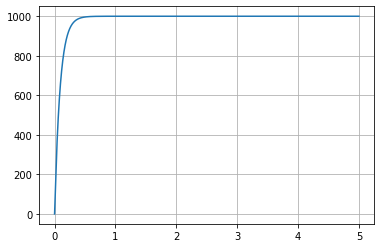

In [8]:
plt.figure(1)
# Specify timeline
t = np.linspace(0, 5, 10000)

target_speed = 1000

# Plot step response
yout, T = step(Sys_cls * target_speed, t)
plt.plot(T.T, yout.T)
plt.grid()
plt.show(block=True)
